# **Análisis exploratorio y estadística**

# AE11 - CAPSTONE - Reconstrucción análisis 538 - Fandango

## <font color='blue'>**Contexto**</font>

__[FiveThirtyEight](https://fivethirtyeight.com/)__, a veces representado como __538__, es un sitio web estadounidense que se centra en el análisis de encuestas de opinión, la política, la economía y los blogs deportivos.

En octubre de 2015, publico un análisis que tituló "Be Suspicious Of Online Movie Ratings, Especially Fandango’s" (Sospeche de las clasificaciones de películas en línea, especialmente de Fandango), en el cual analizaba y cuestionaba el hecho que __la misma empresa__ (Fandango) tenía un __conflicto de interés__ al __publicar las calificaciones__ de las películas y __vender entradas__ al mismo tiempo.

<img src="https://drive.google.com/uc?export=view&id=1ErZN_tzjnzNRHjsPN-Ha2zpB_1_IU_6I" width='900'>


## <font color='blue'>**Preguntas de investigación**</font>
1. ¿Tienen Fandango alguna predisposición a calificar las películas por encima de lo que deberían calificar?
2. ¿Hay evidencias de conflicto de interés en un sitio web que nos entrega las calificaciones de las películas y que, además, nos vende entradas?


## <font color='blue'>**Misión**</font>
Su objetivo es completar las actividades a continuación basándose en el artículo __538__ mencionado, y ver si llega a una conclusión similar. Utilice los conocimientos adquiridos (`Pandas`, `Numpy`,`Malplotlib`, visualización y estadísticas) para determinar si las calificaciones de Fandango en 2015 tenían un sesgo hacia calificar mejor las películas para vender más boletos.



## <font color='blue'>__Ejercicios__</font>

### <font color='green'>**Actividad 1**</font>
### Investigación de los antecedentes y los datos


1. Lea el artículo: [Sospeche de las calificaciones de películas en línea, especialmente las de Fandango](http://fivethirtyeight.com/features/fandango-movies-ratings/)
2. Lea los datasets del estudio. Hay dos archivos csv, uno con las calificaciones de Fandango (`fandango_scrape.csv`), y el otro con datos agregados para clasificaciones de películas de otros sitios, como Metacritic, IMDB y Rotten Tomatoes (`all_sites_scores.csv`). Los datos de Fandango se extrajeron el 24 de agosto de 2015, y contienen al menos 3 valoraciones de usuarios por película.
3. Explore las características de ambos datasets.

__Descripción de all_sites_scores.csv__

Columna | Contenido
--- | -----------
FILM | La película analizada
RottenTomatoes | Rotten Tomatoes Tomatometer valoración para la película
RottenTomatoes_User | Rotten Tomatoes valoración de usuario para la película
Metacritic | Metacritic valoración para la película
Metacritic_User | Metacritic valoración de usuario para la película
IMDB | IMDb valoración de usuario para la película
Metacritic_user_vote_count | Número de votos de usuario que tuvo la película en Metacritic
IMDB_user_vote_count | Número de votos de usuario que tuvo la película en IMDb


__Descripción de fandango_scrape.csv__

Contiene todas las películas analizadas por el sitio __538__.

Columna | Contenido
--- | ---------
FILM | La película analizada
STARS | Valoración en estrellas presentada en Fandango.com
RATING |El valor de calificación de Fandango para la película, extraído del HTML de cada página. Esta es la puntuación media real que obtuvo la película.
VOTES | Cantidad de personas que habían revisado la película en el momento en que la sacamos.

In [ ]:
# Tu código aquí ...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.__version__

'1.5.3'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Leemos los archivos
fandango = pd.read_csv("/content/drive/MyDrive/Archivos/Copia de fandango_scrape.csv")
all_sites = pd.read_csv("/content/drive/MyDrive/Archivos/Copia de all_sites_scores.csv")

In [ ]:
# Exploramos los archivos
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [ ]:
fandango.describe(include = 'all')

,FILM,STARS,RATING,VOTES
count,504,504.000000,504.000000,504.000000
unique,503,NaN,NaN,NaN
top,Nannbenda (2015),NaN,NaN,NaN
freq,2,NaN,NaN,NaN
mean,NaN,3.558532,3.375794,1147.863095
std,NaN,1.563133,1.491223,3830.583136
min,NaN,0.000000,0.000000,0.000000
25%,NaN,3.500000,3.100000,3.000000
50%,NaN,4.000000,3.800000,18.500000
75%,NaN,4.500000,4.300000,189.750000


In [ ]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [ ]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [ ]:
all_sites.describe(include = 'all')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
unique,146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Avengers: Age of Ultron (2015),NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,NaN,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,NaN,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,NaN,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,NaN,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,NaN,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000


In [ ]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


<font color='green'>Fin actividad 1</font>

### <font color='green'>**Actividad 2**</font>

### Explorando las valoraciones mostradas en Fandango frente a las puntuaciones reales de los usuarios

Exploremos las calificaciones de Fandango para ver si nuestro análisis está de acuerdo con la conclusión del artículo.

1. Explore la relación entre la popularidad de una película y su calificación. Cree un diagrama de dispersión que muestre la relación entre la calificación y los votos.
2. Calcule la correlación entre las distintas variables y visualícelas.
3. Calcule cuántas películas hay en Fandango por año y visualice.
4. Cuáles son las 10 películas con más votaciones?
5. Cuántas películas tienen cero votos?
6. Cree un nuevo DataFrame con las películas que tienen al menos un voto



In [ ]:
# Definición de estilo de seaborn
sns.set(context='notebook',style='darkgrid',palette='dark')

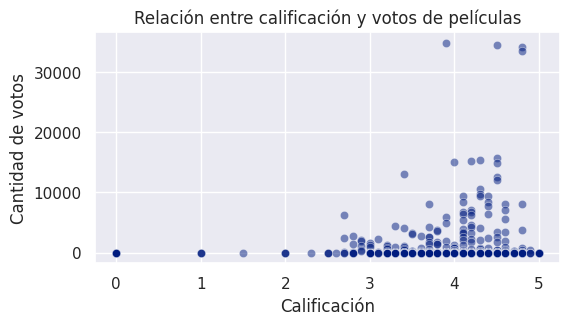

In [ ]:
# Tu código aquí ...
# 1. Relación entre la popularidad de una película y su calificación
# Creación del diagrama de dispersión
plt.figure(figsize=(6, 3))
sns.scatterplot(x='RATING', y='VOTES', data=fandango, alpha=0.5)
plt.title('Relación entre calificación y votos de películas')
plt.xlabel('Calificación')
plt.ylabel('Cantidad de votos')
plt.show()


El gráfico muestra que practicamente no existen calificaciones bajas, concentrándose en el tramo de 3 a 5, independiente de su popularidad.

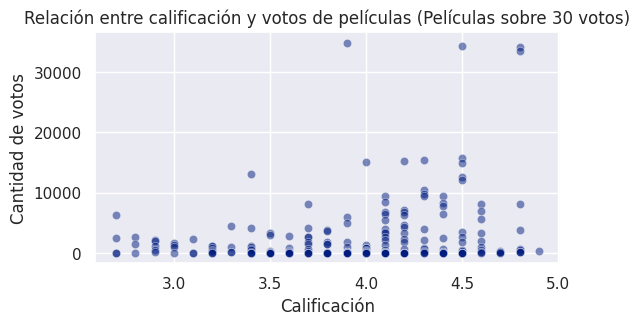

In [ ]:
datos_filtrados = fandango[fandango['VOTES'] >= 30]

plt.figure(figsize=(6, 3))
sns.scatterplot(x='RATING', y='VOTES', data=datos_filtrados, alpha=0.5)
plt.title('Relación entre calificación y votos de películas (Películas sobre 30 votos)')
plt.xlabel('Calificación')
plt.ylabel('Cantidad de votos')
plt.show()


Situación que se remarca al filtrar las películas con más de 30 votaciones.

In [ ]:
# 2. Correlación entre las distintas variables
correlacion_fandango = fandango[['STARS', 'RATING', 'VOTES']].corr()
correlacion_fandango


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


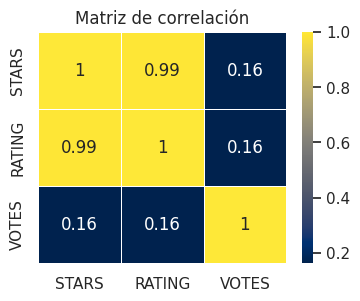

In [ ]:
# Visualización de la matriz de correlación.
plt.figure(figsize=(4, 3))
sns.heatmap(correlacion_fandango, annot=True, cmap='cividis', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()


Confirmando lo anterior, tanto la matriz como el mapa de calor indican que no existe una correlación entre la popularidad de las películas y su puntuación. Además, se aprecia una leve diferencia entre "STARS" y "RATING" lo que indica que no son completamente los mismos puntajes, lo cual ya es un indicador de sospecha, puesto que deberían exactamente los mismo puntajes.

In [ ]:
# 3. Calcule cuántas películas hay en Fandango por año y visualice.
# Dado que el formato del nombre de las películas incluye el año,
# extraemos esa parte del string.
fandango['YEAR'] = fandango['FILM'].str.extract(r'\((\d{4})\)')[0]

# Luego contamos las películas por año y ordenamos por año.
peliculas_por_año = fandango['YEAR'].value_counts().sort_index()
peliculas_por_año


1964      1
2012      1
2014     24
2015    477
2016      1
Name: YEAR, dtype: int64

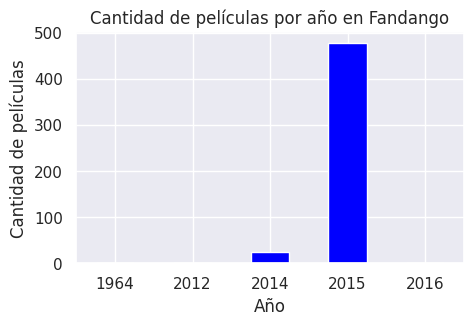

In [ ]:
# Graficamos la serie.
plt.figure(figsize=(5, 3))
peliculas_por_año.plot(kind='bar', color='blue')
plt.title('Cantidad de películas por año en Fandango')
plt.xlabel('Año')
plt.ylabel('Cantidad de películas')
plt.xticks(rotation=0)
plt.show()


La gran mayoría de las películas de Fandango son contemporáneas al momento del análisis, lo que puede implicar que las películas calificadas deben coincidir con las películas de las que Fandango vendía entradas.

In [ ]:
# 4. Las 10 películas con más votos
top_10_peliculas = fandango.sort_values(by='VOTES', ascending=False).head(10)
top_10_peliculas


,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


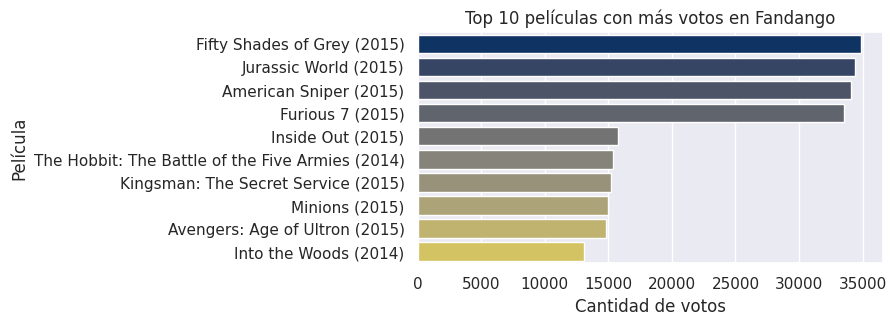

In [ ]:
# Graficamos de acuerdo a los votos.
plt.figure(figsize=(6, 3))
ax = sns.barplot(x='VOTES', y='FILM', data=top_10_peliculas, palette='cividis')
ax.set_xlabel('Cantidad de votos')
ax.set_ylabel('Película')
ax.set_title('Top 10 películas con más votos en Fandango')
plt.show()


In [ ]:
# 5. Cuántas películas tienen cero votos
peliculas_con_cero_votos = fandango[fandango['VOTES'] == 0].shape[0]
peliculas_con_30_menos = fandango[fandango['VOTES'] < 30].shape[0]
print(f'Hay {peliculas_con_cero_votos} películas con 0 votos.')
print(f'Hay {peliculas_con_30_menos} películas con menos de 30 votos.')


Hay 69 películas con 0 votos.
Hay 292 películas con menos de 30 votos.


De forma similar al artículo, se calcula la cantidad de películas con menos de 30 votos, lo que constituye más del 50% de las películas.

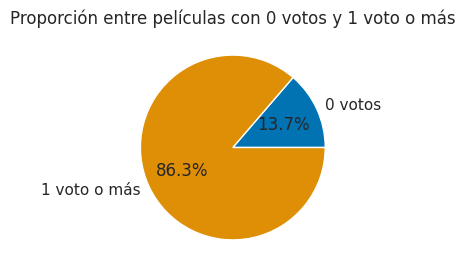

In [ ]:
# Generamos un gráfico para visualizar la proporción de películas con y sin votación.
# Calculamos cuantas peliculas tienen votos.
peliculas_con_un_voto_o_mas = fandango[fandango['VOTES'] >= 1].shape[0]

# Asignamos variables para el gráfico.
labels = ['0 votos', '1 voto o más']
sizes = [peliculas_con_cero_votos, peliculas_con_un_voto_o_mas]

# Generamos un gráfico de torta para saber que tan significativa es la proporción.
plt.figure(figsize=(5, 3))
sns.set_palette("colorblind")
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Proporción entre películas con 0 votos y 1 voto o más')
plt.show()


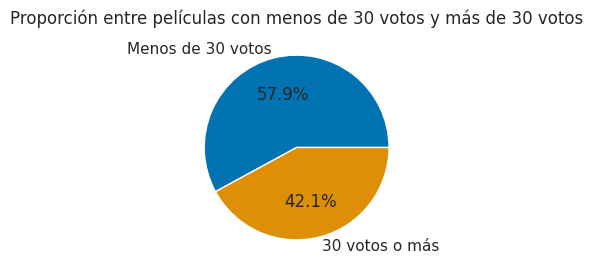

In [ ]:
peliculas_con_30_votos_o_mas = fandango[fandango['VOTES'] >= 30].shape[0]

# Asignamos variables para el gráfico.
labels = ['Menos de 30 votos', '30 votos o más']
sizes = [peliculas_con_30_menos, peliculas_con_30_votos_o_mas]

# Generamos un gráfico de torta para saber que tan significativa es la proporción.
plt.figure(figsize=(5, 3))
sns.set_palette("colorblind")
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Proporción entre películas con menos de 30 votos y más de 30 votos')
plt.show()


La mayoría de las películas cuentan con menos de 30 votos.

In [ ]:
# 6. Creamos una nuevo DataFrame con las películas con al menos una valoración
peliculas_con_valoracion = fandango[fandango['VOTES'] >= 1].copy()
peliculas_con_valoracion.tail()


,FILM,STARS,RATING,VOTES,YEAR
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015
434,Z For Zachariah (2015),5.0,5.0,1,2015


<font color='green'>Fin actividad 2</font>

### <font color='green'>**Actividad 3**</font>

En un sistema de redondeo normal, un sitio redondearía a la media estrella de valoración más cercana, hacia arriba o hacia abajo. Como se indica en el artículo, el sistema de redondeo de Fandango, y a modo de ejemplo, en el caso de "Ted 2", esperaríamos que la calificación se redondeara a 4 estrellas (dado que la valoración es de usuarios es 4.1). Sin embargo, Fandango redondeó el "ratingValue" hacia arriba, hasta un 4.5. Esto nos demuestra que la calificación real del usuario puede ser ligeramente diferente a la calificación que se le muestra a un usuario en el sitio web.
Visualice esta diferencia en distribuciones.

1. Verifique con gráficos KDE rellenos si las distribuciones de las calificaciones que se muestran (STARS) son distintas a la calificación real de los votos (RATING). Tip: recorte los KDE a 0-5 con
`clip=[0,5]`

2. Si es que en el punto anterior hay una diferencia, cuantifíquela y añádala en una nueva columna del DataFrame. Esta nueva columna debe quedar expresada con un decimal.

3. Grafique la cantidad de veces que cada diferencia (0.1, 0.2, 0.3, etc.) se produce.

4. ¿Qué película(s) tiene(n) un diferencial de más de media estrella?

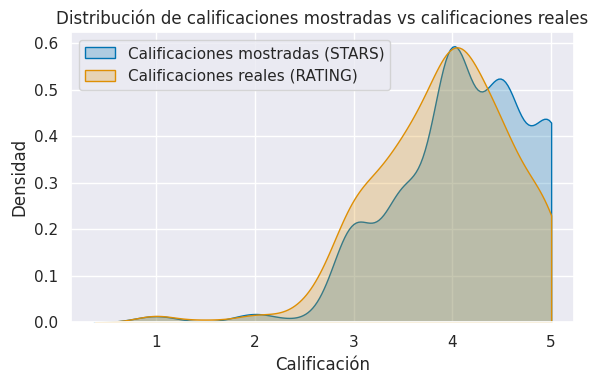

In [ ]:
# Tu código aquí ...
# 1. Comparamos los KDEs
plt.figure(figsize=(6, 4))

# Generamos los gráficos KDE rellenos con el parámetro clip=(0, 5)
sns.kdeplot(data=peliculas_con_valoracion['STARS'], fill=True, label='Calificaciones mostradas (STARS)', clip=(0, 5))
sns.kdeplot(data=peliculas_con_valoracion['RATING'], fill=True, label='Calificaciones reales (RATING)', clip=(0, 5))
plt.xlabel('Calificación')
plt.ylabel('Densidad')
plt.title('Distribución de calificaciones mostradas vs calificaciones reales')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


Se aprecia un desplazamiento hacia las calificaciones más altas para las calificaciones que se muestran al público en Fandango (STARS) respecto de las calificaciones reales rescatadas del código HTML de la página (RATING).

In [ ]:
# 2. Cuantifiquemos ahora realmente esta discrepancia.
# Calculamos la diferencia entre las valoraciones y redondeamos a 1 decimal.
peliculas_con_valoracion['DIFFERENCE'] = (peliculas_con_valoracion['STARS'] - peliculas_con_valoracion['RATING']).round(1)
peliculas_con_valoracion.head()


,FILM,STARS,RATING,VOTES,YEAR,DIFFERENCE
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


In [ ]:
# 3. Cantidad de veces que las diferencias se producen.
# Calculamos la frecuencia de cada diferencia entre las valoraciones.
diferencia_frecuencia = peliculas_con_valoracion['DIFFERENCE'].value_counts().sort_index()
diferencia_frecuencia


0.0    107
0.1     66
0.2     82
0.3     72
0.4     70
0.5     37
1.0      1
Name: DIFFERENCE, dtype: int64

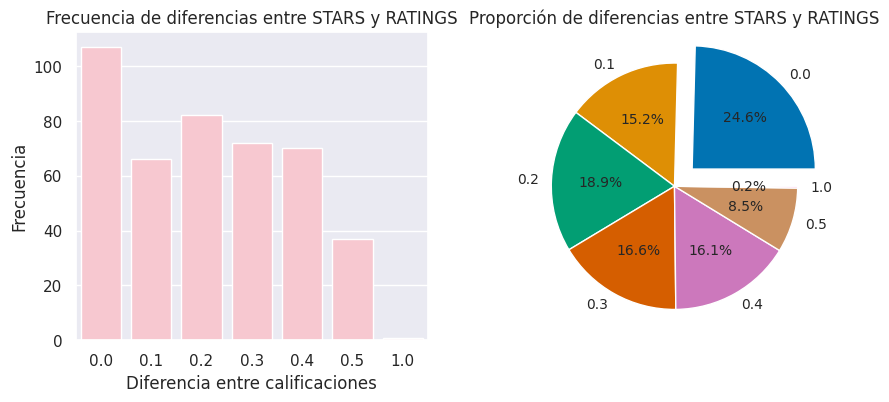

<Figure size 500x300 with 0 Axes>

In [ ]:
# Generamos el espacio para 2 gráficos.
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Graficamos la frecuencia de las diferencias con un gráfico de barras.
sns.barplot(x=diferencia_frecuencia.index, y=diferencia_frecuencia.values, color='pink', ax=axs[0])
axs[0].set_xlabel('Diferencia entre calificaciones')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title('Frecuencia de diferencias entre STARS y RATINGS')
axs[0].tick_params(axis='x', rotation=0)


# Graficamos la proporción de cada diferencia en un gráfico de torta.
# Asignamos variables para el gráfico.
labels = diferencia_frecuencia.index
sizes = diferencia_frecuencia.values
explode = (0.2, 0, 0, 0, 0, 0, 0)

plt.figure(figsize=(5, 3))
sns.set_palette("colorblind")
axs[1].pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 10}, explode=explode)
axs[1].set_title('Proporción de diferencias entre STARS y RATINGS')

plt.tight_layout()
plt.show()


Complementando la frecuencia de las diferencias entre puntuaciones, es posible consignar a través del gráfico circular que apenas una cuarta parte de las valoraciones no presentan diferencias, en tanto que cerca del 75% de las valoraciones que son mostradas al público en la página de Fandango están adulteradas.

In [ ]:
# 4. Buscamos la pelicula con una diferencia de una estrella
pelicula_diferencia_una_estrella = peliculas_con_valoracion[peliculas_con_valoracion['DIFFERENCE'] == 1.0]
pelicula_diferencia_una_estrella


,FILM,STARS,RATING,VOTES,YEAR,DIFFERENCE
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


<font color='green'>Fin actividad 3</font>

### <font color='green'>**Actividad 4**</font>
## Comparación de las valoraciones de Fandango con Rotten Tomatoes

Compare las valoraciones de Fandango con la de __Rotten Tomatoes__. Analice y comente las diferencias.

1. Analice __Rotten Tomatoes__ (__RT__). Observe cómo el sitio tiene dos valoraciones; una de críticos especializados y otra de usuarios. Realice una visualización de dispersión de ambas variables.

2. Determine la diferencia comparando las calificaciones de los críticos y las calificaciones de los usuarios de __RT__. Cree una nueva columna basada en la diferencia entre las calificaciones de los críticos y las calificaciones de los usuarios para Rotten Tomatoes. Calcule esto con `RottenTomatoes - RottenTomatoes_User`

3. Calcule la diferencia media absoluta obtenida en el punto 2. Atención con los valores negativos.

4. Visualice con 2 subplots horizontales:
  * La distribución de las diferencias entre `RT Critics Score` y `RT User Score`. Debe haber valores negativos en esta gráfica de distribución. Utilice KDE e histogramas para mostrar esta distribución.
  * La distribución que muestre la diferencia en valor absoluto.
  * Incluya un título a cada subplot y un título general a nivel del lienzo (figure).

5. ¿Cuáles son las 10 películas más valoradas por los usuarios en promedio que los críticos? Y ¿Cuáles son las 10 películas con mejores valoraciones de críticos de películas que de usuarios?

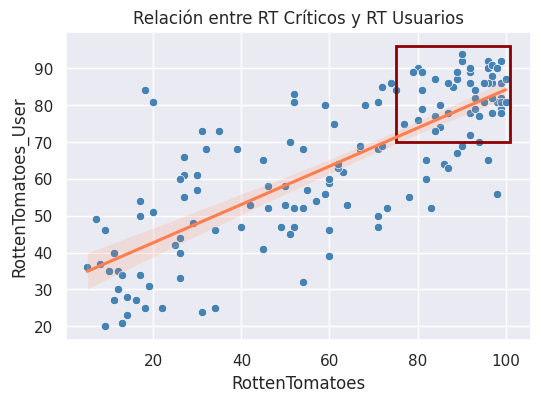

In [ ]:
# Tu código aquí ...
# 1. Dispersión de RT
plt.figure(figsize=(6, 4))
sns.scatterplot(x='RottenTomatoes', y='RottenTomatoes_User', data=all_sites, color='steelblue')
plt.xlabel('Rotten Tomatoes (Críticos)')
plt.ylabel('Rotten Tomatoes (Usuarios)')
plt.title('Relación entre RT Críticos y RT Usuarios')

# Generamos una línea de regresión lineal para ayudar a la visualización.
sns.regplot(x='RottenTomatoes', y='RottenTomatoes_User', data=all_sites, scatter=False, color='coral')

# Dibujamos un cuadrado en la sección de concentración de valoraciones.
coord_X = 75
coord_y = 70
side_len = 26
plt.gca().add_patch(plt.Rectangle((coord_X, coord_y), side_len, side_len, fill=None, color='darkred', linewidth=2))

plt.show()


Del gráfico es posible ver una coherencia entre las valoraciones de críticos con las de usuarios con una especial concentración en la sección de altas valoraciones donde se aprecia una convergencia mayor entre las valoraciones de críticos con las de usuarios.

In [ ]:
# 2. Rotten_Diff =  Critics - User Score.
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']
all_sites.head()


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


In [ ]:
# 3. Diferencia media absoluta
dma_rotten_diff = all_sites['Rotten_Diff'].abs().mean().round(1)
print(f'La diferencia media absoluta es de: {dma_rotten_diff}')


La diferencia media absoluta es de: 15.1


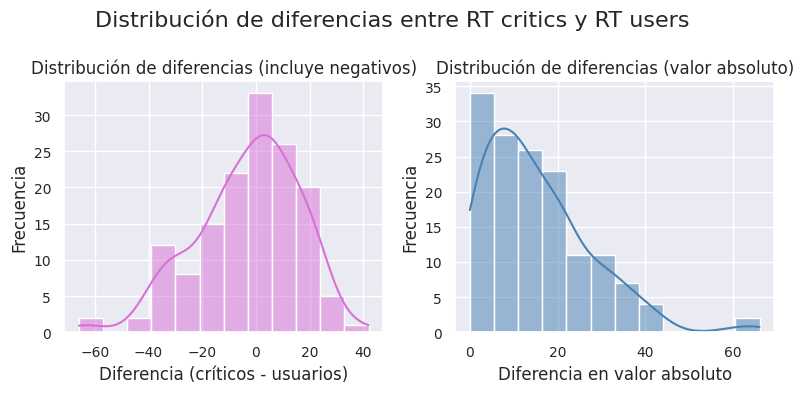

In [ ]:
# 4. Visualización de la distribución de las diferencias y del valor absoluto de las diferencias
# Generamos el espacio para dos gráficos con subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Subplot 1: Distribución de las diferencias con valores negativos.
sns.histplot(all_sites['Rotten_Diff'], kde=True, ax=axs[0], color='orchid')
axs[0].tick_params(axis='both', labelsize=10)
axs[0].set_xlabel('Diferencia (críticos - usuarios)')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title('Distribución de diferencias (incluye negativos)')

# Subplot 2: Distribución de las diferencias en valor absoluto.
sns.histplot(all_sites['Rotten_Diff'].abs(), kde=True, ax=axs[1], color='steelblue')
axs[1].tick_params(axis='both', labelsize=10)
axs[1].set_xlabel('Diferencia en valor absoluto')
axs[1].set_ylabel('Frecuencia')
axs[1].set_title('Distribución de diferencias (valor absoluto)')

# Título general a nivel del lienzo.
fig.suptitle('Distribución de diferencias entre RT critics y RT users', fontsize=16)

plt.tight_layout()
plt.show()


La distribución es cercana a la normal, donde la concentración de valoraciones se distribuye alrededor del 0, es decir, a una convergencia en las valoraciones entre críticos y usuarios de Rotten Tomatoes.

In [ ]:
# 5. Las 10 películas más valoradas por los usuarios en promedio que los críticos
# Calculamos la diferencia positiva entre valoración de usuarios y de críticos.
all_sites['RT_Diff_Users_vs_Critics'] = all_sites['RottenTomatoes_User'] - all_sites['RottenTomatoes']

# Ordenamos las 10 primeras filas con la mayor diferencia positiva entre usuarios y críticos.
top_10_movies_users_vs_critics = all_sites.nlargest(10, 'RT_Diff_Users_vs_Critics')[['FILM', 'RT_Diff_Users_vs_Critics', 'RottenTomatoes_User', 'RottenTomatoes']]
top_10_movies_users_vs_critics


,FILM,RT_Diff_Users_vs_Critics,RottenTomatoes_User,RottenTomatoes
3,Do You Believe? (2015),66,84,18
85,Little Boy (2015),61,81,20
105,Hitman: Agent 47 (2015),42,49,7
134,The Longest Ride (2015),42,73,31
125,The Wedding Ringer (2015),39,66,27
132,Max (2015),38,73,35
15,Taken 3 (2015),37,46,9
19,Pixels (2015),37,54,17
51,Entourage (2015),36,68,32
47,Annie (2014),34,61,27


In [ ]:
# Las 10 películas con mejores valoraciones de críticos de películas que de usuarios
# Ordenamos las 10 primeras filas con la mayor diferencia positiva entre críticos y usuarios.
top_10_movies_critics_vs_users = all_sites.nlargest(10, 'Rotten_Diff')[['FILM', 'Rotten_Diff', 'RottenTomatoes', 'RottenTomatoes_User']]
top_10_movies_critics_vs_users


,FILM,Rotten_Diff,RottenTomatoes,RottenTomatoes_User
69,Mr. Turner (2014),42,98,56
112,It Follows (2015),31,96,65
115,While We're Young (2015),31,83,52
37,Welcome to Me (2015),24,71,47
40,I'll See You In My Dreams (2015),24,94,70
145,"Kumiko, The Treasure Hunter (2015)",24,87,63
90,The SpongeBob Movie: Sponge Out of Water (2015),23,78,55
7,Top Five (2014),22,86,64
11,Black Sea (2015),22,82,60
87,Maggie (2015),22,54,32


<font color='green'>Fin actividad 4</font>

### <font color='green'>**Actividad 5**</font>
## Comparación de las valoraciones de Fandango con MetaCritic

Ahora echemos un vistazo a las calificaciones de __MetaCritic__. Metacritic también muestra una calificación de usuario promedio en comparación con su calificación oficial mostrada.

1. Realice una visualización de dispersión de ambas variables.

2. Determine la diferencia comparando las calificaciones de los críticos y las calificaciones de los usuarios de __RT__. De forma similar a la __Actividad 4__ cree una nueva columna basada en la diferencia entre las calificaciones de los críticos y las calificaciones de los usuarios para MetaCritic. Calcule esto con `Metacritic - Metacritic_User`

3. Visualice las comparación de diferencias de __RT__ con las de __MetaCritic__.

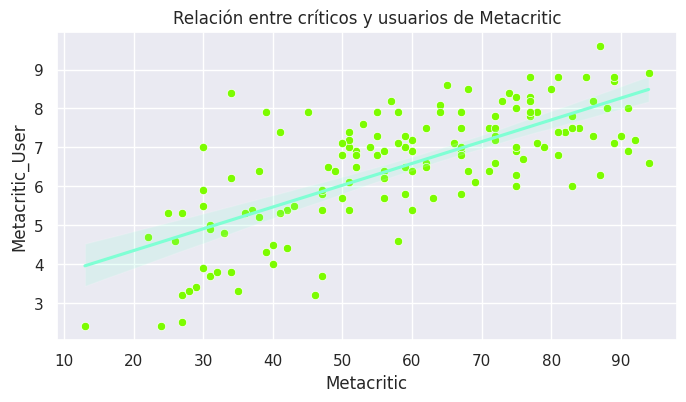

In [ ]:
# Tu código aquí ...
# 1. Visualización de dispersión de crítica oficial versus de usuarios
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Metacritic', y='Metacritic_User', data=all_sites, color='lawngreen')
plt.xlabel('Metacritic (críticos)')
plt.ylabel('Metacritic (usuarios)')
plt.title('Relación entre críticos y usuarios de Metacritic')

# Generamos una línea de regresión lineal para ayudar a la visualización.
sns.regplot(x='Metacritic', y='Metacritic_User', data=all_sites, scatter=False, color='aquamarine')

plt.show()


De forma similar a lo que sucede con Rotten Tomatoes, las valoraciones de críticos y usuarios de Metacritic tienden a una convergencia.

Para que la diferencia entre valoraciones tenga más sentido y sea más explícita visualmente, optamos por normalizar los puntajes entre usuarios y críticos antes de seguir con los cálculos.

In [ ]:
# Normalización del puntaje de críticos a una escala de 1 a 10
all_sites['Metacritic_Norm_1_10'] = (all_sites['Metacritic'])/10
all_sites[['FILM', 'Metacritic', 'Metacritic_Norm_1_10']].head()


,FILM,Metacritic,Metacritic_Norm_1_10
0,Avengers: Age of Ultron (2015),66,6.6
1,Cinderella (2015),67,6.7
2,Ant-Man (2015),64,6.4
3,Do You Believe? (2015),22,2.2
4,Hot Tub Time Machine 2 (2015),29,2.9


In [ ]:
# 2. Metacritic_Diff =  Criticos - Usuarios
all_sites['Metacritic_Diff'] = all_sites['Metacritic_Norm_1_10'] - all_sites['Metacritic_User']
all_sites[['FILM', 'Metacritic_Norm_1_10', 'Metacritic_User', 'Metacritic_Diff']].head()


,FILM,Metacritic_Norm_1_10,Metacritic_User,Metacritic_Diff
0,Avengers: Age of Ultron (2015),6.6,7.1,-0.5
1,Cinderella (2015),6.7,7.5,-0.8
2,Ant-Man (2015),6.4,8.1,-1.7
3,Do You Believe? (2015),2.2,4.7,-2.5
4,Hot Tub Time Machine 2 (2015),2.9,3.4,-0.5


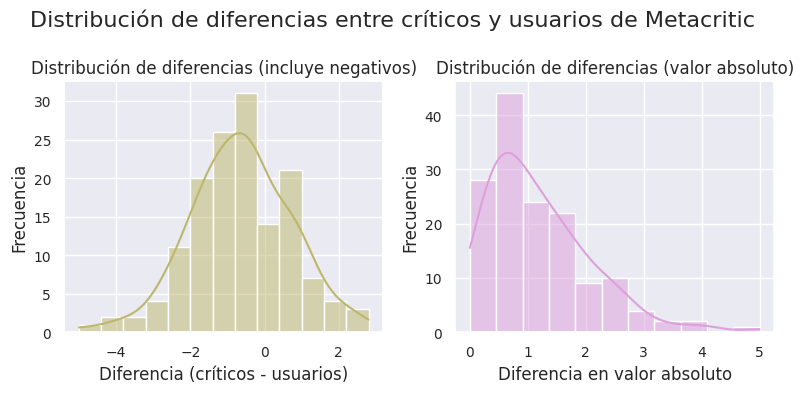

In [ ]:
# Graficamos lo obtenido anteriormente para visualizar la diferencia.
# Generamos el espacio para dos gráficos con subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Subplot 1: Distribución de las diferencias con valores negativos.
sns.histplot(all_sites['Metacritic_Diff'], kde=True, ax=axs[0], color='darkkhaki')
axs[0].tick_params(axis='both', labelsize=10)
axs[0].set_xlabel('Diferencia (críticos - usuarios)')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title('Distribución de diferencias (incluye negativos)')

# Subplot 2: Distribución de las diferencias en valor absoluto.
sns.histplot(all_sites['Metacritic_Diff'].abs(), kde=True, ax=axs[1], color='plum')
axs[1].tick_params(axis='both', labelsize=10)
axs[1].set_xlabel('Diferencia en valor absoluto')
axs[1].set_ylabel('Frecuencia')
axs[1].set_title('Distribución de diferencias (valor absoluto)')

# Título general a nivel del lienzo.
fig.suptitle('Distribución de diferencias entre críticos y usuarios de Metacritic', fontsize=16)

plt.tight_layout()
plt.show()

En forma análoga al caso de Rotten Tomatoes, la concentración de las diferencias entre las valoraciones de los críticos y usuarios de Metacritic se concentran alrededor de una diferencia de menos de 1 punto entre ambas.

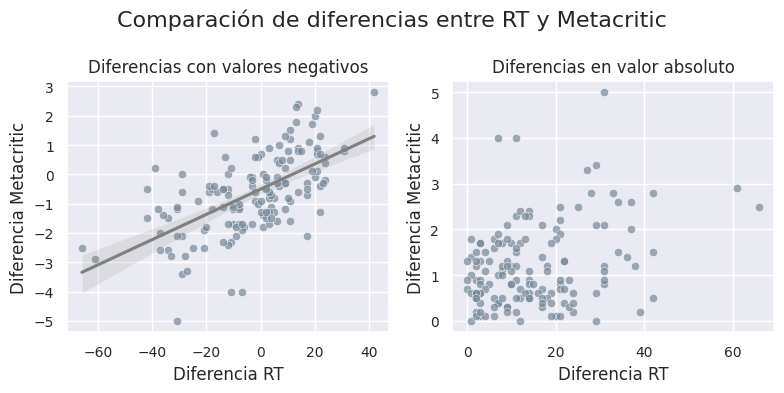

In [ ]:
# 3. Dispersión de diferencias
# Generamos el espacio para dos gráficos con subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Subplot 1: Distribución de las diferencias con valores negativos.
sns.scatterplot(x='Rotten_Diff', y='Metacritic_Diff', data=all_sites, ax=axs[0], color='lightslategrey', alpha=0.7)
sns.regplot(x='Rotten_Diff', y='Metacritic_Diff', data=all_sites,  ax=axs[0], scatter=False, color='gray')
axs[0].tick_params(axis='both', labelsize=10)
axs[0].set_xlabel('Diferencia RT')
axs[0].set_ylabel('Diferencia Metacritic')
axs[0].set_title('Diferencias con valores negativos')

# Subplot 2: Distribución de las diferencias en valor absoluto.
sns.scatterplot(x=all_sites['Rotten_Diff'].abs(), y=all_sites['Metacritic_Diff'].abs(), data=all_sites, ax=axs[1], color='lightslategrey', alpha=0.7)
axs[1].tick_params(axis='both', labelsize=10)
axs[1].set_xlabel('Diferencia RT')
axs[1].set_ylabel('Diferencia Metacritic')
axs[1].set_title('Diferencias en valor absoluto')

# Título general a nivel del lienzo.
fig.suptitle('Comparación de diferencias entre RT y Metacritic', fontsize=16)

plt.tight_layout()
plt.show()


Cuando se comparan las diferencias en las valoraciones entre críticos y usuarios para ambas plataformas (Rotten Tomatoes y Metacritic) es posible ver una consistencia en la discrepancia de valoración para ambas plataformas, es decir, si una película presenta una diferencia en la valoración entre críticos y usuarios en Rotten Tomatoes, es probable que esa diferencia exista en una medida similar en Metacritic.

Sin embargo, las diferencias tienden a ser bajas ya que, como complemento, se genera una gráfico de dispersión con valores absolutos donde es posible ver una concentración en la zona de bajas diferencias para ambas páginas.

<font color='green'>Fin actividad 5</font>

### <font color='green'>**Actividad 6**</font>
## Comparación de valoraciones de Fandago vs. All Sites

Explore si Fandango muestra artificialmente calificaciones más altas que las justificadas para impulsar la venta de boletos.

1. Combine ambos datasets (`Fandango` con `All_Sites`). ¿Cuántos registros se pierden en la fusión?
2. Normalice las columnas para que sus escalas sean comparables. Fandango utiliza una escala de $0-5$ para `STARS` y `RATINGS`.
3. Simplifique el DataFrame. Genere una copia con las valoraciones normalizadas. Incluya `STARS`y `RATING` desde Fandango.
4. Compare de la distribución de puntuaciones entre sitios. ¿Fandango muestra calificaciones anormalmente altas? Ya sabemos que su `RATIBG` mostrado es más alto que las valoraciones de usuarios (`STARS`), pero ¿son las calificaciones en sí mismas más altas que el promedio? Analice y comente.
5. Cree una gráfica `hisplot` comparando todas las puntuaciones normalizadas.
6. ¿Cómo se califican las peores películas en todos los sitios? Cree una visualización del tipo `clustermap` de todas las puntuaciones normalizadas. Investigue acerca de esta gráfica avanzada de `Seaborn`.
7. Según las calificaciones de los críticos de __RT__, ¿cuáles son las 10 películas con las calificaciones más bajas? ¿Cuáles son las puntuaciones normalizadas en los otros sitios para estas películas?

In [ ]:
# Tu código aquí ...
# 1. Merge de ambos datasets
# No todas las películas de la tabla Fandango están en la tabla All_Sites
# algunas películas de Fandango tienen muy pocas críticas o ninguna.
# Solo queremos comparar películas que están en ambos DataFrames,

# Fusionamos ambos DataFrames.
merged_df = pd.merge(fandango, all_sites, on='FILM', how='inner')
merged_df.head()


,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Diff_Users_vs_Critics,Metacritic_Norm_1_10,Metacritic_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,17,4.6,1.4
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,10,5.9,-1.1
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,13,7.2,0.6
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,3,6.7,-0.1
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,-8,9.4,0.5


In [ ]:
# Para contabilizar los datos perdidos, generamos un DataFrame
data = {
    'DataFrame': ['fandango', 'all_sites', 'merged_df', 'reg_perdidos'],
    'Registros': [len(fandango), len(all_sites), len(merged_df), (len(fandango) - len(merged_df))]
}
registros_df = pd.DataFrame(data)
registros_df


,DataFrame,Registros
0,fandango,504
1,all_sites,146
2,merged_df,145
3,reg_perdidos,359


Tenga en cuenta que RT, Metacritic e IMDB no usan una puntuación entre 0-5 estrellas como lo hace Fandango. Para hacer una comparación justa, necesitamos * normalizar * estos valores para que todos caigan entre 0 y 5 estrellas y la relación entre las reseñas se mantenga igual.


Tips:
1. https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

2. Otra forma simple de normalizar es dividiendo las escalas para asemejarlas a la de Fandango.
  * 100/20 = 5
  * 10/2 = 5

In [ ]:
# 2. Normalización de las valoraciones
# Normalización de las escalas de 1 a 100 a escala 1 a 5
merged_df['RottenTomatoes_Normalized'] = merged_df['RottenTomatoes'] * 0.05
merged_df['RottenTomatoes_User_Normalized'] = merged_df['RottenTomatoes_User'] * 0.05
merged_df['Metacritic_Normalized'] = merged_df['Metacritic'] * 0.05

# Normalización de las escalas de 1 a 10 a escala 1 a 5
merged_df['Metacritic_User_Normalized'] = merged_df['Metacritic_User'] * 0.5
merged_df['IMDB_Normalized'] = merged_df['IMDB'] * 0.5

merged_df.head()


,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,...,IMDB_user_vote_count,Rotten_Diff,RT_Diff_Users_vs_Critics,Metacritic_Norm_1_10,Metacritic_Diff,RottenTomatoes_Normalized,RottenTomatoes_User_Normalized,Metacritic_Normalized,Metacritic_User_Normalized,IMDB_Normalized
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,...,179506,-17,17,4.6,1.4,1.25,2.10,2.30,1.60,2.10
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,...,241807,-10,10,5.9,-1.1,3.55,4.05,2.95,3.50,3.65
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,...,251856,-13,13,7.2,0.6,3.60,4.25,3.60,3.30,3.70
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,...,207211,-3,3,6.7,-0.1,4.05,4.20,3.35,3.40,3.70
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,...,96252,8,-8,9.4,0.5,4.90,4.50,4.70,4.45,4.30


In [ ]:
# 3. Simplificación del DataFrame
# Hacemos una copia del DataFrame donde se incluyen los puntajes de Fandango y
# las valoraciones normalizadas de Rotten Tomatoes y Metacritic.
simple_df = merged_df[['FILM', 'STARS', 'RATING', 'RottenTomatoes_Normalized', 'RottenTomatoes_User_Normalized', 'Metacritic_Normalized', 'Metacritic_User_Normalized', 'IMDB_Normalized']].copy()
simple_df.head()


,FILM,STARS,RATING,RottenTomatoes_Normalized,RottenTomatoes_User_Normalized,Metacritic_Normalized,Metacritic_User_Normalized,IMDB_Normalized
0,Fifty Shades of Grey (2015),4.0,3.9,1.25,2.10,2.30,1.60,2.10
1,Jurassic World (2015),4.5,4.5,3.55,4.05,2.95,3.50,3.65
2,American Sniper (2015),5.0,4.8,3.60,4.25,3.60,3.30,3.70
3,Furious 7 (2015),5.0,4.8,4.05,4.20,3.35,3.40,3.70
4,Inside Out (2015),4.5,4.5,4.90,4.50,4.70,4.45,4.30


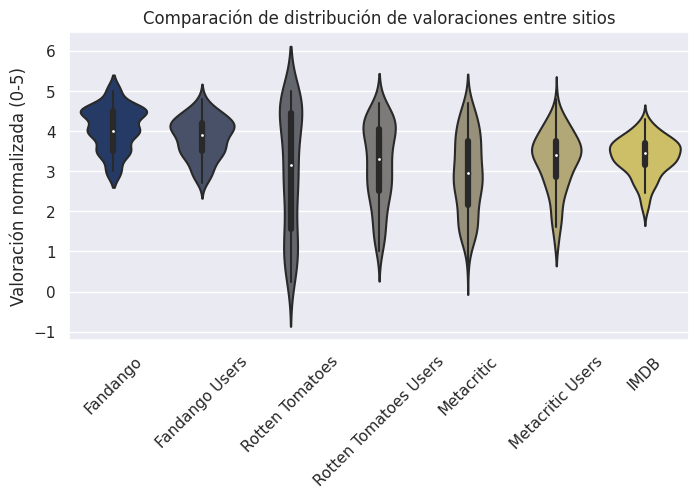

In [ ]:
# 4. Comparando distribuciones de valoraciones
# Renombramos las columnas para una mejor visualización.
simple_df.columns = ['FILM', 'Fandango', 'Fandango Users', 'Rotten Tomatoes', 'Rotten Tomatoes Users', 'Metacritic', 'Metacritic Users', 'IMDB']

# Generación de gráfico de violín para comparar distribuciones.
plt.figure(figsize=(8, 4))
sns.violinplot(data=simple_df, palette='cividis')
plt.title('Comparación de distribución de valoraciones entre sitios')
plt.ylabel('Valoración normalizada (0-5)')
plt.xticks(rotation=45)
plt.show()


Comparando las distribuciones de todos los sitios se ve claramente que la distribución de la página de Fandango (el violín azul del extremo izquierdo) se concentra en las valoraciones altas con una escasa dispersión. Además, es notoria la diferencia con la distribución de valores de usuarios extraídas del código HTML (violin al lado derecho de Fandango).

El resto de las distribuciones, excepto IMDB, presentan una distribución más dispersa de las valoraciones lo que se grafica con violines más alargados.

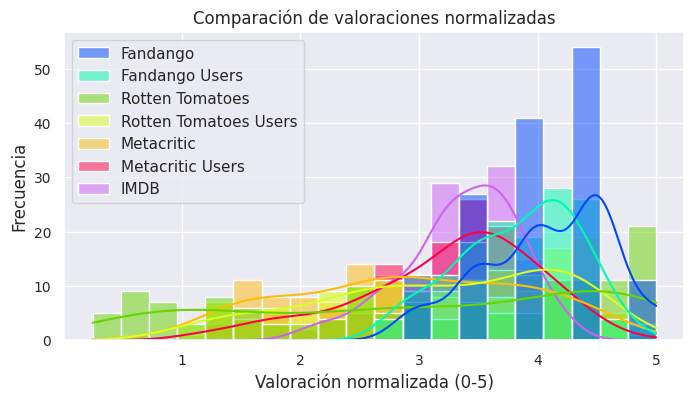

In [ ]:
# 5. Hisplot comparando todas las puntuaciones normalizadas.
# Histplot comparando las valoraciones.
plt.figure(figsize=(8, 4))
sns.histplot(data=simple_df, kde=True, palette='gist_ncar', element='bars')
plt.tick_params(axis='both', labelsize=10)
plt.title('Comparación de valoraciones normalizadas')
plt.xlabel('Valoración normalizada (0-5)')
plt.ylabel('Frecuencia')
plt.show()


<Figure size 800x400 with 0 Axes>

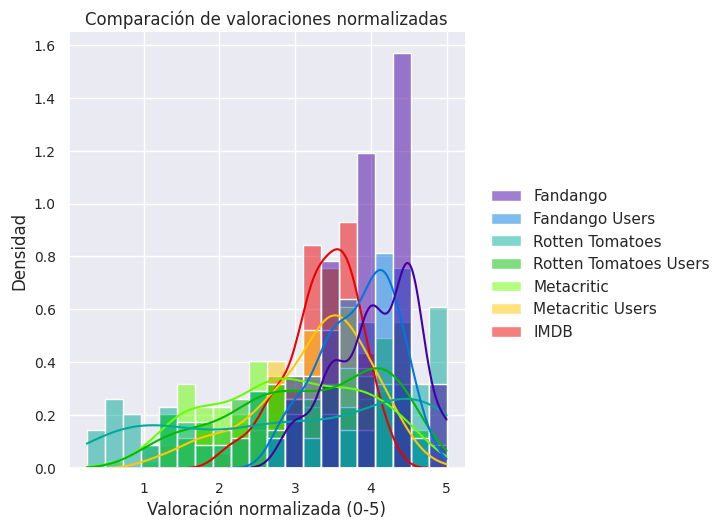

In [ ]:
# Displot comparando las valoraciones.
plt.figure(figsize=(8, 4))
sns.displot(data=simple_df, stat='density', common_norm=False, kde=True, palette='nipy_spectral', element='bars')
plt.tick_params(axis='both', labelsize=10)
plt.title('Comparación de valoraciones normalizadas')
plt.xlabel('Valoración normalizada (0-5)')
plt.ylabel('Densidad')
plt.show()


Ante la duda, optamos por usar `histplot` y `displot` para mostrar las distribuciones normalizadas.

Para ambos casos es posible ver el desplazamiento hacia las valoraciones altas en las distribuciones de Fandango respecto de las distribuciones de los otros sitios.

Por otro lado, tanto la frecuencia (en el caso de `histplot`) como la densidad (en el caso de `displot`) muestran una concentración en el segmento de altas valoraciones, a diferencia de los otros sitios que presentan distribuciones más planas, lo que significa una mayor dispersión en las valoraciones.

<Figure size 1400x1400 with 0 Axes>

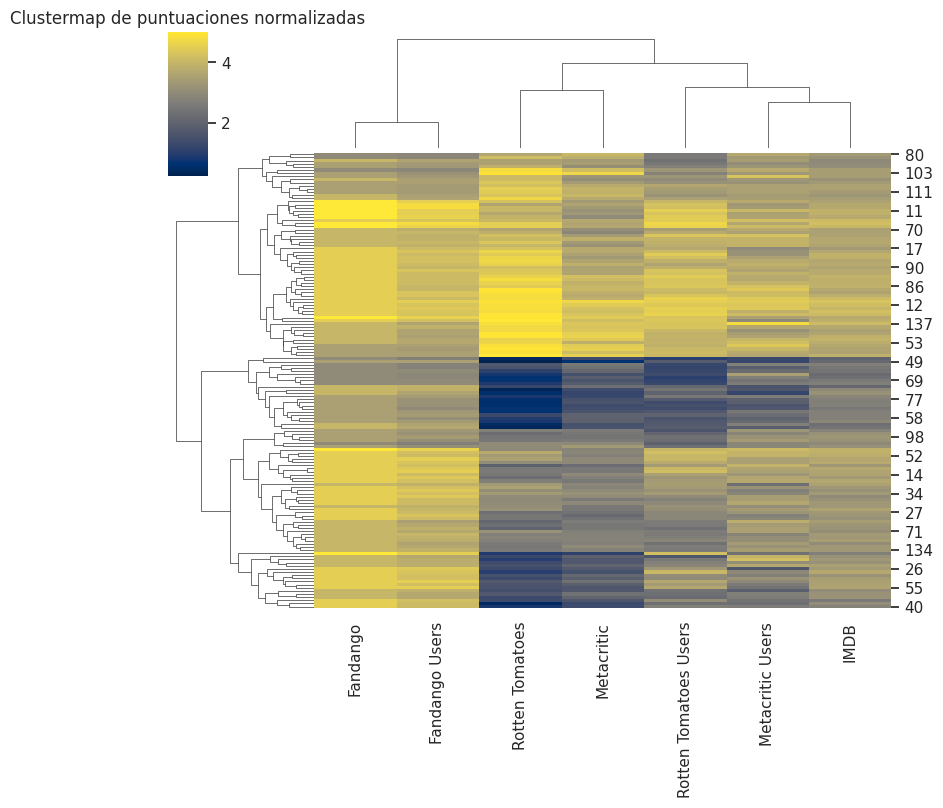

In [ ]:
# 6. clustermap
# Las películas de alta calificación
# deben agruparse en comparación con las películas de baja calificación.

# Escogemos las columnas para generar el clustermap.
columnas_cluster = simple_df[['Fandango', 'Fandango Users', 'Rotten Tomatoes', 'Rotten Tomatoes Users', 'Metacritic', 'Metacritic Users', 'IMDB']]

# Creamos una visualización tipo clustermap de las valoraciones normalizadas.
plt.figure(figsize=(14, 14))
sns.clustermap(columnas_cluster, method='average', cmap='cividis', figsize=(8, 8))
plt.title('Clustermap de puntuaciones normalizadas')
plt.show()


El `clustermap` agrupa las películas con valoraciones normalizadas similares.

Los dendrogramas situados en el costado izquierdo y superior del gráfico muestran la similitud de los datos. Así, en el dendrograma izquierdo, dada la estructura resultante, no es posible apreciar alguna agrupación en particular. En cambio, en el dendrograma de la parte superior se produce una notoria separación entre las columnas Fandango y Fandango Users y el resto de las columnas, lo que tiene sentido ya que ambas columnas deberían tener los mismos valores.

Visualmente, la similitud de las agrupaciones permite ver la diferencia en las calificaciones entre Fandango y los otros sitios a nivel de las columnas. Así, las columnas de Fandango son mayormente amarillas dada la tendencia hacia las altas calificaciones. En cambio, los colores azules (valoraciones bajas) son compartidos por los otros sitios. El hecho de que las columnas de críticos de Rotten Tomatoes y Metacritic estén juntas denota una similitud en las calificaciones para las mismas películas. Del mismo modo que las columnas de usuarios para ambos sitios están agrupadas dada la similitud de las calificaciones de los usuarios de ambos sitios.

In [ ]:
# 7. Examinemos las 10 peores películas.
# Ordenamos el DataFrame para mostrar las 10 calificaciones más bajas de los críticos Rotten tomatoes.
peores_10_criticos_RT = simple_df.sort_values(by='Rotten Tomatoes', ascending=True)
peores_10_criticos_RT.head(10)


,FILM,Fandango,Fandango Users,Rotten Tomatoes,Rotten Tomatoes Users,Metacritic,Metacritic Users,IMDB
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.25,1.80,0.65,1.20,2.15
84,Hitman: Agent 47 (2015),4.0,3.9,0.35,2.45,1.40,1.65,2.95
54,Hot Pursuit (2015),4.0,3.7,0.40,1.85,1.55,1.85,2.45
25,Taken 3 (2015),4.5,4.1,0.45,2.30,1.30,2.30,3.05
28,Fantastic Four (2015),3.0,2.7,0.45,1.00,1.35,1.25,2.00
50,The Boy Next Door (2015),4.0,3.6,0.50,1.75,1.50,2.75,2.30
88,The Loft (2015),4.0,3.6,0.55,2.00,1.20,1.20,3.15
87,Unfinished Business (2015),3.5,3.2,0.55,1.35,1.60,1.90,2.70
78,Mortdecai (2015),3.5,3.2,0.60,1.50,1.35,1.60,2.75
77,Seventh Son (2015),3.5,3.2,0.60,1.75,1.50,1.95,2.75


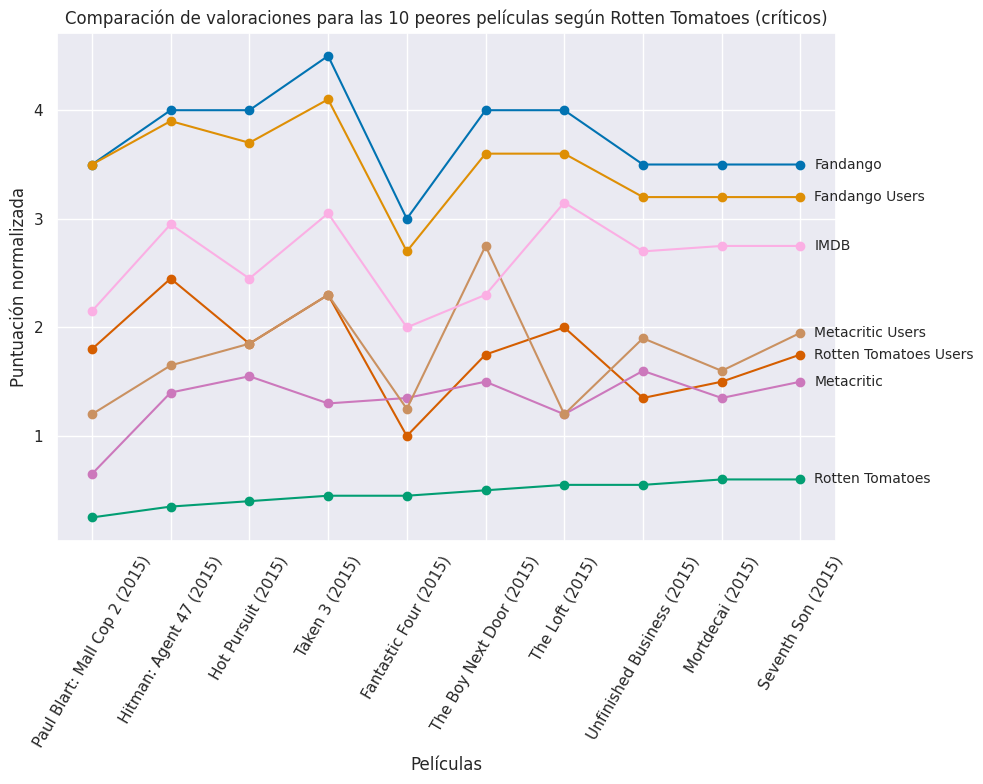

In [77]:
# Visualizamos lo anterior.
comparacion_peores_10 = peores_10_criticos_RT.head(10)

plt.figure(figsize=(10, 8))
lineas = plt.plot(comparacion_peores_10['FILM'], comparacion_peores_10.drop('FILM', axis=1), marker='o')
plt.title('Comparación de valoraciones para las 10 peores películas según Rotten Tomatoes (críticos)')
plt.xlabel('Películas')
plt.ylabel('Puntuación normalizada')
plt.xticks(rotation=60)

# Añadimos etiquetas sobre las líneas.
for i, linea in enumerate(lineas):
  y_value = linea.get_ydata()[-1] # Para situar el ínicio de la etiqueta en el último valor.
  plt.annotate(comparacion_peores_10.columns[i + 1], xy=(len(comparacion_peores_10) - 1, y_value),
               fontsize=10, ha='left', va='center', xytext=(10, 0), textcoords='offset points')

plt.tight_layout()
plt.show()


Además de la notoria diferencia entre Fandango y los demás sitios, se aprecia una sistemática diferencia entre la calificación mostrada en la página de Fandango y la calificación del código HTML de la página.

<font color='green'>Fin actividad 6</font>

## <font color='blue'>**Conclusiones**</font>

Finalmente, respondiendo a la pregunta de investigación:

***¿Tiene Fandango alguna predisposición a calificar las películas por encima de lo que deberían calificar?***

De los múltiples gráficos presentados, en todos se observaron que las calificaciones mostradas en la página están por encima de las calificaciones encontradas en su código HTML, por lo que es posible concluir que, efectivamente, Fandango calificó las películas por encima de lo que debió calificar.

En tanto que para la pregunta:

***¿Hay evidencias de conflicto de interés en un sitio web que nos entrega las calificaciones de las películas y que, además, nos vende entradas?***

De la respuesta a la pregunta anterior, se desprende el hecho de que Fandango elevó artificialmente las calificaciones de las películas.

Otra evidencia que refuerza lo anterior, es que Fandango no presenta calificaciones negativas, de hecho, la media de calificaciones es de 3,5 (en una escala de 0 a 5), lo que se mostró en las diversas gráficas.

Estos dos hechos, evidencian el conflicto de interés ya que una película con una alta calificación tendría más probabilidad de vender entradas que una con baja calificación.





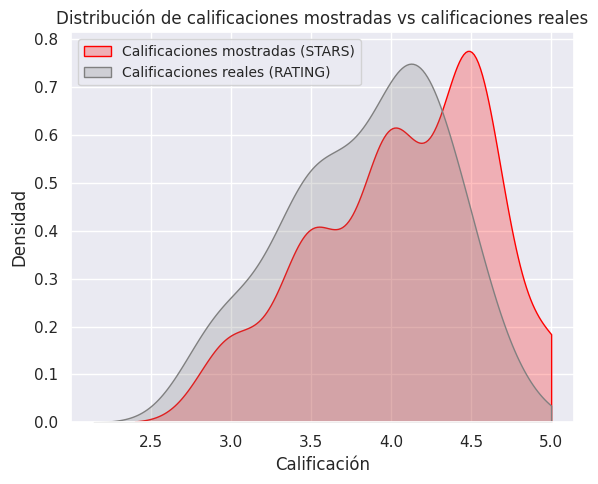

In [ ]:
# Gráfico kde relleno para las calificaciones de Fandango, luego de unir ambos DataFrame.
plt.figure(figsize=(6, 5))
sns.kdeplot(data=simple_df['Fandango'], fill=True, label='Calificaciones mostradas (STARS)', color='red', clip=(0, 5))
sns.kdeplot(data=simple_df['Fandango Users'], fill=True, label='Calificaciones reales (RATING)', color='grey', clip=(0, 5))
plt.xlabel('Calificación')
plt.ylabel('Densidad')
plt.title('Distribución de calificaciones mostradas vs calificaciones reales')
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

<img src="https://fivethirtyeight.com/wp-content/uploads/2015/10/hickey-datalab-fandango-3.png" alt="Valoración Fandango" width="500"/>

Finalmente, comparamos el gráfico kde relleno que muestra el comportamiento tanto de la distribución de valoraciones mostradas en la página como de la distribución de valoraciones encontradas en su código HTML y vemos que es bastante similar al gráfico mostrado por la página ***Fivethirtyeight***, en el sentido de evidenciar el redondeo hacia arriba en las valoraciones de las películas de Fandango.